##  PCA 이상 탐지(차원축소, 시각화 기반 이상탐지)
___
* 정의
```
# 여러 변수 간에 존재하는 상관관계를 이용하여 이를 대표한 주성분을 추출해 차원을 축소하는 기법
# 기존 데이터의 유실을 최소하 하기 위해 데이터의 분산을 최대화 할 수 있는 초평면(Hyper plane)을 찾고 데이터를 투영함
# 다중공선성(변수중 상관관계가 높아 각 변수의 특성을 잘 알 수 없는 것)을 제거하기 위해 각 벡터의 축이 직각(상관관계 없도록)이 되도록 투영 시킴
# 원본 데이터의 Feature 개수에 비해 매우 적은 주성분으로 원본 데이터의 총 변동성을 대부분 설명할 수 있는 분석법, 연산량을 줄여줌.
```
<img src = "https://drive.google.com/uc?id=16dNJTSMUiFmk4wQtJ7hP3HmL0wUy1vgP">

* 장단점
```
  # [good] 고차원에 데이터를 저차원에 주성분으로 표현할 수 있음
  # [good] 선택한 변수들의 해석이 용이함
  # [bad] 변수간 상관관계 고려가 어려움 
  # [bad] 추출된 변수의 해석이 어려움 (※ 주성분, PC1/PC2 ...)
```
  
* 사용방법
```
# from sklearn.decomposition import PCA
# 데이터 정규화 필수
# 학습 데이터셋에서 분산이 최대인 축(axis)을 탐색
# 이렇게 찾은 첫번째 축과 직교(orthogonal)하면서 분산이 최대인 두 번째 축을 탐색
# 첫 번째 축과 두 번째 축에 직교하고 분산을 최대한 보존하는 세 번째 축을 탐색
# 1~3과 같은 방법으로 데이터셋의 차원(특성 수)만큼의 축을 탐색
```

* 현업사례
```
# 다양한 검사 공정에서 이상 제품 탐지
# 데이터 EDA를 통한 클러스터링
```


### 실습
___

In [1]:
# iris 데이터세트
#from sklearn.datasets import load_iris
#iris = load_iris()
#df = pd.DataFrame(data= np.c_[iris.data, iris.target] , 
#                  columns= ['sepal length', 'sepal width', 'petal length', 'petal width', 'target'])
import seaborn as sns
import pandas as pd
df=sns.load_dataset('iris')

In [2]:
# ▶ Data 확인 
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline  # 전처리할때 한꺼번에 하려고 파이프라인 구축

# ▶ Create scaler: scaler
scaler = StandardScaler()

# ▶ Create a PCA instance: pca
pca = PCA()

# ▶ Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

pipeline.fit(df.drop(['species'], axis=1))

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [6]:
print(pca.n_components_)

4


In [7]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [8]:
# ▶ pca.n_components_(차원 축소 주성분 개수)
features = range(pca.n_components_)
feature_df=pd.DataFrame(data=features,columns=['pc_feature'])

# ▶ pca.explained_variance_ratio_(설명력)
variance_df=pd.DataFrame(data=pca.explained_variance_ratio_,columns=['variance'])
pc_feature_df=pd.concat([feature_df,variance_df],axis=1)
pc_feature_df

# ▶ PC0, PC1으로도 전체 분산에 95% 이상 설명 가능

,pc_feature,variance
0,0,0.729624
1,1,0.228508
2,2,0.036689
3,3,0.005179


In [12]:
pc

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [13]:
pc_df

,PC1,PC2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa
...,...,...,...
145,1.870503,0.386966,virginica
146,1.564580,-0.896687,virginica
147,1.521170,0.269069,virginica
148,1.372788,1.011254,virginica


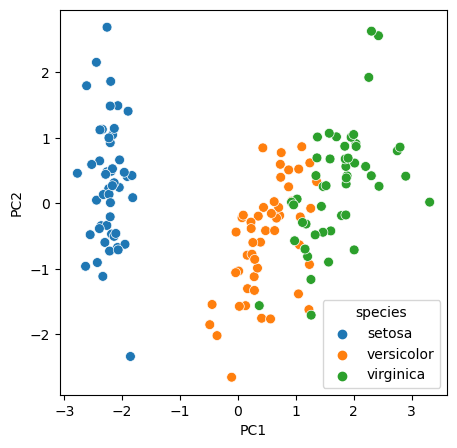

In [14]:
import matplotlib.pyplot as plt
#import seaborn as sns
#%matplotlib inline
#plt.style.use(['dark_background'])

x=df.drop(['species'], axis=1)
y=df['species']

# ▶ 정규화
X_ = StandardScaler().fit_transform(x)

# ▶ 2개의 주성분으로 차원 축소
pca = PCA(n_components=2)
pc = pca.fit_transform(X_)


pc_df=pd.DataFrame(pc,columns=['PC1','PC2']).reset_index(drop=True)
pc_df=pd.concat([pc_df,y],axis=1)

plt.rcParams['figure.figsize'] = [5, 5]
sns.scatterplot(data=pc_df,x='PC1',y='PC2',hue=y, legend='brief', s=50, linewidth=0.5);

# ▶ 각 클러스터 중심에서 멀리 떨어진 Data 일 수록 이상치, 마할라노비스 거리를 추가로 계산해도 됨. threshold 설정하는 방법도 있음.

##  t-SNE 이상 탐지(차원축소, 시각화 기반 이상탐지)
___
* 정의
```
# PCA는 선형 분석 방식으로 값을 투영하기 때문에 차원이 감소되면서 군집화 되어 있는 데이터들이 밀집되어 구별하기 어려운 단점
# 상위의 단점을 보완하기 위한 차원 감소 방법 t-SNE
# t-분포를 사용하여 데이터 유사도를 계산하므로, 꼬리가 두꺼운(분산이 큰) t-분포에서는 유사도(similarity)가 낮은 데이터일 수록  
더 멀리 떨어뜨리는 효과 발생(정규분포에 비해)
# 유사도(similarity)가 비슷한 데이터끼리 묶어줌
# t-분포를 이용하여 기준점과 상대점과의 거리를 기준으로 t-분포의 확률분포를 유사도(similarity)로 사용하여 표현
# 주로 시각화 Tool로 사용, PCA로 구분되지 않는 경우 활용 가능
```
<img src = "https://drive.google.com/uc?id=1fiwBO7-GG0SuHmkrXYS36WXodGhWfRVN" width="300" height="270">
<img src = "https://drive.google.com/uc?id=1xuiR2Yhc1YgXNHdOFpSU5GsxJqdCEwjp" width="500" height="270">


* 장단점
```
  # [good] PCA 대비 조금 더 고차원에 데이터를 저차원에 데이터로 클러스터링 하는데 유리 (※ 군집이 중복되지 않는 효과)
  # [good] 사용하기 쉬움
  # [good] 비선형 관계의 데이터를 군집화 할 수 있음
  # [bad] 데이터의 개수가 많을 수록 연산량이 증가함
  # [bad] 매번 돌릴 때마다 다른 시각화 결과가 도출됨
```
  
* 사용방법
```
# from sklearn.manifold import TSNE
# 데이터 정규화 필수
# Hyper parameter 선정
# 시각화 및 클러스터링
```

* 현업사례
```
# 다양한 검사 공정에서 이상 제품 탐지
# 데이터 EDA를 통한 클러스터링
```


### 실습
___

In [1]:
import seaborn as sns
import pandas as pd
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
from sklearn.manifold import TSNE

# ▶ class target 정보 제외
train_df = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# ▶ 2차원 t-SNE 임베딩
# - n_components : 차원 수
# - perplexity : 주변 이웃 데이터 참조 개수
# - learning_rate : 학습률, 크면 너무 붙어있게 되고 작으면 너무 멀어짐(특징X)
# - n_iter : 최적화 반복 횟수
tsne_np = TSNE(n_components = 2).fit_transform(train_df)

# ▶ numpy array -> DataFrame 변환
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])
tsne_df

C:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


,component 0,component 1
0,5.491953,-22.084263
1,4.575656,-19.440933
2,5.720380,-19.629507
3,5.345833,-19.162823
4,5.337502,-22.095385
...,...,...
145,-10.005669,16.581932
146,-7.747273,14.311744
147,-9.403303,15.916043
148,-10.891044,16.796978


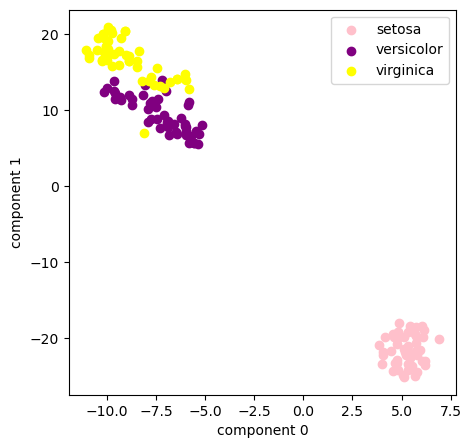

In [12]:
import matplotlib.pyplot as plt

# ▶ class target 정보 불러오기 
tsne_df['target'] = df['species']

# ▶ target 별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == 'setosa']
tsne_df_1 = tsne_df[tsne_df['target'] == 'versicolor']
tsne_df_2 = tsne_df[tsne_df['target'] == 'virginica']

# ▶ target 별 시각화
plt.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], color = 'pink', label = 'setosa')
plt.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], color = 'purple', label = 'versicolor')
plt.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], color = 'yellow', label = 'virginica')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()

In [13]:
# ▶ 3차원 t-SNE 임베딩
tsne_np = TSNE(n_components = 3).fit_transform(train_df)

# ▶ numpy array -> DataFrame 변환
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1', 'component 2'])
tsne_df

C:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


,component 0,component 1,component 2
0,-28.235050,13.508920,59.153625
1,14.956245,30.096085,135.933960
2,-146.364151,-45.521698,-65.399338
3,-21.964996,45.136219,161.166595
4,-84.459389,-2.781350,101.505241
...,...,...,...
145,150.902969,-2.434454,9.329291
146,-15.224595,3.735110,-39.668915
147,74.463333,96.754112,10.231189
148,107.358665,-74.759361,-3.494952


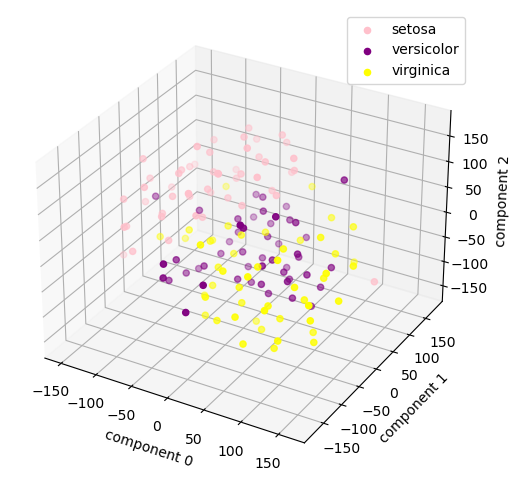

In [15]:
from mpl_toolkits.mplot3d import Axes3D

# ▶ 3차원 그래프 세팅
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')

# ▶ class target 정보 불러오기 
tsne_df['target'] = df['species']

# ▶ target 별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == 'setosa']
tsne_df_1 = tsne_df[tsne_df['target'] == 'versicolor']
tsne_df_2 = tsne_df[tsne_df['target'] == 'virginica']

#  ▶ target 별 시각화
ax.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], tsne_df_0['component 2'], color = 'pink', label = 'setosa')
ax.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], tsne_df_1['component 2'], color = 'purple', label = 'versicolor')
ax.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], tsne_df_2['component 2'], color = 'yellow', label = 'virginica')

ax.set_xlabel('component 0')
ax.set_ylabel('component 1')
ax.set_zlabel('component 2')
ax.legend()
plt.show()

In [1]:
import seaborn as sns
import pandas as pd

titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [2]:
y = titanic['survived']
titanic = titanic.drop(['survived', 'alive'], axis=1)
titanic

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alone
0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,False
1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,False
2,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,True
3,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,False
4,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,True
887,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,True
888,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,False
889,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,True


In [3]:
titanic['sex'] = titanic['sex'].map(lambda x: 0 if x == 'male' else 1)
titanic['who'] = titanic['who'].map(lambda x: 0 if x == 'man' else 1 if x == 'woman' else 2)
titanic['class'] = titanic['class'].map(lambda x: 0 if x == 'First' else 1 if x == 'Second' else 2)

In [4]:
titanic.drop(['embarked', 'deck', 'embark_town', 'age'], axis=1, inplace=True)
titanic

,pclass,sex,sibsp,parch,fare,class,who,adult_male,alone
0,3,0,1,0,7.2500,2,0,True,False
1,1,1,1,0,71.2833,0,1,False,False
2,3,1,0,0,7.9250,2,1,False,True
3,1,1,1,0,53.1000,0,1,False,False
4,3,0,0,0,8.0500,2,0,True,True
...,...,...,...,...,...,...,...,...,...
886,2,0,0,0,13.0000,1,0,True,True
887,1,1,0,0,30.0000,0,1,False,True
888,3,1,1,2,23.4500,2,1,False,False
889,1,0,0,0,30.0000,0,0,True,True


In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline  # 전처리할때 한꺼번에 하려고 파이프라인 구축
import matplotlib.pyplot as plt

scaler = MinMaxScaler()
pca = PCA()
pipe = make_pipeline(scaler, pca)
pipe.fit(titanic)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('pca', PCA())])

In [6]:
pca.n_components_

9

In [7]:
pca.explained_variance_ratio_

array([4.97142286e-01, 2.83556583e-01, 1.60058317e-01, 3.27438541e-02,
       9.64958261e-03, 8.77644110e-03, 4.62854822e-03, 3.44438820e-03,
       4.26387194e-31])

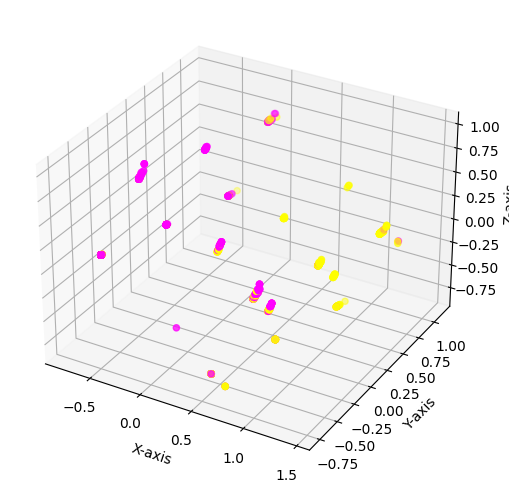

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline  # 전처리할때 한꺼번에 하려고 파이프라인 구축
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

scaler = MinMaxScaler()
titanic_sc = scaler.fit_transform(titanic)

pca = PCA(n_components=3)
titanic_pca = pca.fit_transform(titanic_sc)

pca_all = pd.DataFrame(titanic_pca, columns=['x', 'y', 'z'])
pca_all = pd.concat([pca_all, y], axis=1)


pca_all

# 3차원 그래프 생성
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

# 산점도 그리기
ax.scatter(pca_all['x'], pca_all['y'], pca_all['z'], c=pca_all['survived'], cmap='spring')

# 축 레이블 설정
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# 그래프 보이기
plt.tight_layout()
plt.show()


In [9]:
from sklearn.manifold import TSNE

# ▶ class target 정보 제외
train_titanic = titanic.copy()

# ▶ 2차원 t-SNE 임베딩# - n_components : 차원 수
# - perplexity : 주변 이웃 데이터 참조 개수
# - learning_rate : 학습률, 크면 너무 붙어있게 되고 작으면 너무 멀어짐(특징X)
# - n_iter : 최적화 반복 횟수
sc = MinMaxScaler()
train_titanic_sc = sc.fit_transform(train_titanic)
tsne_titanic = TSNE(n_components = 3).fit_transform(train_titanic_sc)

# ▶ numpy array -> DataFrame 변환
tsne_titanic_df = pd.DataFrame(tsne_titanic, columns = ['component 0', 'component 1', 'component 2'])
tsne_all = pd.concat([tsne_titanic_df, y], axis=1)
tsne_all

,component 0,component 1,component 2,survived
0,-7.385448,1.757197,24.569115,0
1,24.449392,22.587154,4.519952,1
2,15.962621,-16.247669,-24.702520,1
3,30.071589,26.363106,6.233372,1
4,-34.571354,21.254852,13.522840,0
...,...,...,...,...
886,-21.561378,10.132551,-24.742449,0
887,-1.471227,21.917461,-31.691969,1
888,9.056265,-29.684441,24.277834,0
889,1.090572,31.908522,-17.213484,1


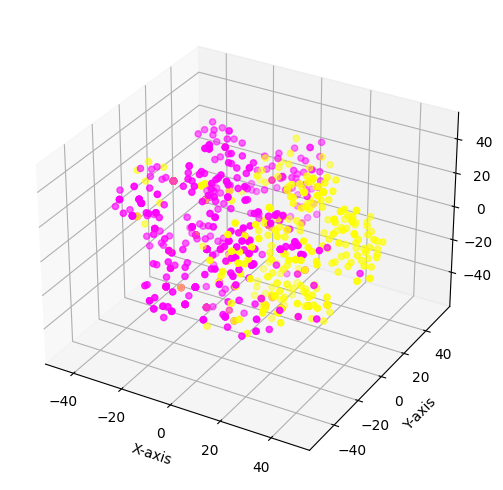

In [10]:
# tsne_all = pd.DataFrame(tsne_all, columns=['x', 'y', 'z'])
# tsne_all = pd.concat([tsne_all, y], axis=1)

tsne_all

# 3차원 그래프 생성
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

# 산점도 그리기
ax.scatter(tsne_all['component 0'], tsne_all['component 1'], tsne_all['component 2'], c=tsne_all['survived'], cmap='spring')

# 축 레이블 설정
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# 그래프 보이기
plt.tight_layout()
plt.show()

In [11]:
tsne_all

,component 0,component 1,component 2,survived
0,-7.385448,1.757197,24.569115,0
1,24.449392,22.587154,4.519952,1
2,15.962621,-16.247669,-24.702520,1
3,30.071589,26.363106,6.233372,1
4,-34.571354,21.254852,13.522840,0
...,...,...,...,...
886,-21.561378,10.132551,-24.742449,0
887,-1.471227,21.917461,-31.691969,1
888,9.056265,-29.684441,24.277834,0
889,1.090572,31.908522,-17.213484,1


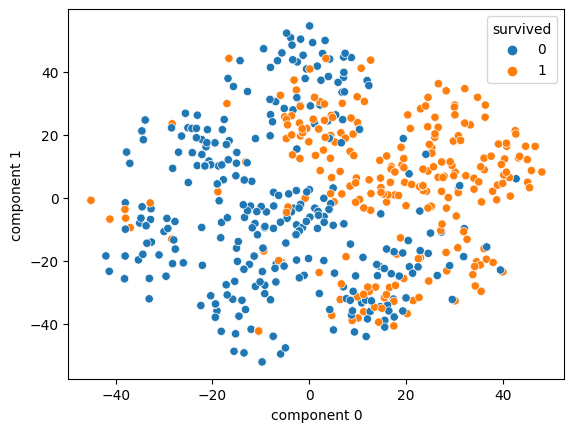

In [12]:
plt.figure()
sns.scatterplot(x=tsne_all['component 0'], y=tsne_all['component 1'], hue=tsne_all['survived'])
plt.show()

In [33]:
from sklearn.datasets import load_wine

wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target
y = pd.DataFrame(y, columns=['target'])
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [17]:
scaler = MinMaxScaler()
pca = PCA()
pipe = make_pipeline(scaler, pca)
pipe.fit(df)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()), ('pca', PCA())])

In [19]:
pca.explained_variance_ratio_

array([0.40749485, 0.18970352, 0.08561671, 0.07426678, 0.05565301,
       0.04658837, 0.03663929, 0.02408789, 0.02274371, 0.02250965,
       0.01381292, 0.01273236, 0.00815095])

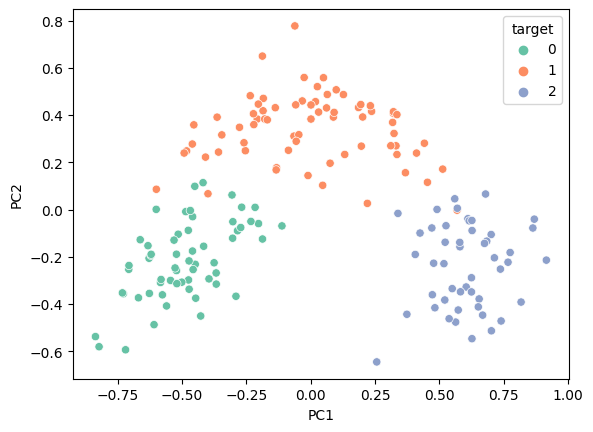

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_sc = scaler.fit_transform(df)

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_sc)

df_wine = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
wine_all = pd.concat([df_wine, y], axis=1)

plt.figure()
sns.scatterplot(x='PC1', y='PC2', hue='target', data=wine_all, palette='Set2')
plt.show()

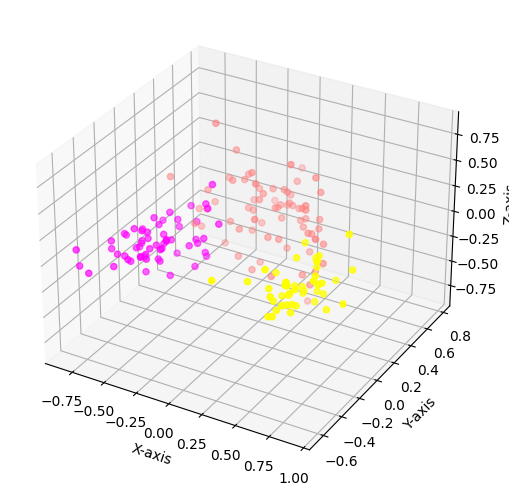

In [42]:
df_sc = scaler.fit_transform(df)

pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_sc)

df_wine = pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3'])
wine_all = pd.concat([df_wine, y], axis=1)

# 3차원 그래프 생성
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

# 산점도 그리기
ax.scatter(wine_all['PC1'], wine_all['PC2'], wine_all['PC3'], c=wine_all['target'], cmap='spring')

# 축 레이블 설정
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# 그래프 보이기
plt.tight_layout()
plt.show()


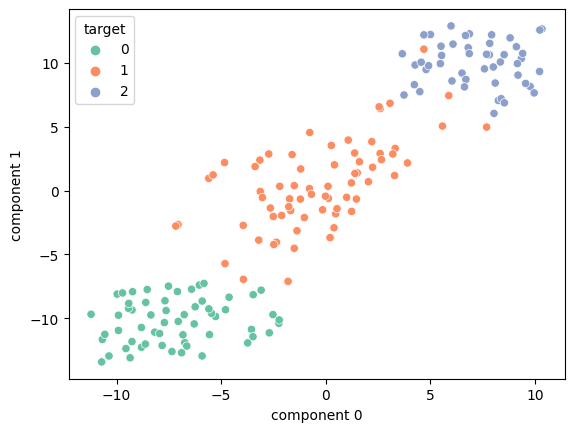

In [100]:
from sklearn.manifold import TSNE

df_ts = df.copy()
wine_tsne_sc = scaler.fit_transform(df_ts)

wine_tsne = TSNE(n_components=2, random_state=14).fit_transform(wine_tsne_sc)

# ▶ numpy array -> DataFrame 변환
wine_tsne_df = pd.DataFrame(wine_tsne, columns = ['component 0', 'component 1'])
wine_tsne_all = pd.concat([wine_tsne_df, y], axis=1)

plt.figure()
sns.scatterplot(x='component 0', y='component 1', data=wine_tsne_all, hue='target', palette='Set2')
# plt.scatter(wine_tsne_all['component 0'], wine_tsne_all['component 1'], c=wine_tsne_all['target'], cmap='Set2')
plt.show()

In [101]:
%matplotlib qt5
df_ts = df.copy()
wine_tsne_sc = scaler.fit_transform(df_ts)

wine_tsne = TSNE(n_components=3).fit_transform(wine_tsne_sc)

# ▶ numpy array -> DataFrame 변환
wine_tsne_df = pd.DataFrame(wine_tsne, columns = ['component 0', 'component 1', 'component 2'])
wine_tsne_all = pd.concat([wine_tsne_df, y], axis=1)

# 3차원 그래프 생성
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')

# 산점도 그리기
ax.scatter(wine_tsne_all['component 0'], wine_tsne_all['component 1'], wine_tsne_all['component 2'], c=wine_tsne_all['target'], cmap='Set2')

# 축 레이블 설정
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# 그래프 보이기
plt.tight_layout()
plt.show()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [117]:
sns.histplot(df['total_phenols'], bins= 10)

<Axes: xlabel='total_phenols', ylabel='Count'>